Script to simulate the logistics of vessels over a graph of the Rhinebranches in the Netherlands.



In [4]:
#In this cell all the needed packages in this script are imported:

import math
from numpy import *
import matplotlib.pyplot as plt
import csv
from scipy.optimize import fsolve,newton
import networkx as nx
import numpy as np
import pandas as pd

In [5]:
#Physical parameters
g=9.81

## Define the parameters of the river system 

Text(0.5,1,'waterlevel for normal flow in river stretch')

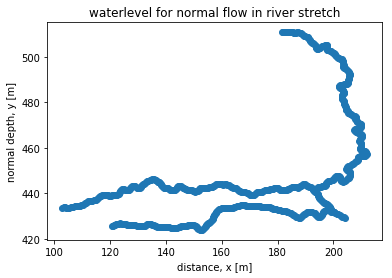

In [6]:
#Bathymetry river system: This is a file based on the data of a SOBEK-simulation in 2013 (provided by Max Schropp to Koen Hiemstra).
with open ('River_branches_data.csv') as f:   #Reading csv file with bathymetry data of the river branches
    reader = csv.reader(f, delimiter=';')
    base_list = list(reader)
    mylist=base_list[1:681]

# Define lists of parameters
    
    point=[]
    name=[]
    x=[]
    y=[]
    kms=[]
    waterlevels=[]
    waterlevels700=[]
    width_summerbed=[]
    level_summerbed=[]
    level_winterbed=[]
    chezy=[]
    coordinaten=[]

    for row in mylist:
        point.append(row [0])
        name.append(row [1])
        x.append(row[2])
        y.append(row[3])
        kms.append(row[5])
        waterlevels.append(row [9])
        waterlevels700.append(row[8])
        width_summerbed.append(row[11])
        level_summerbed.append(row[21])
        level_winterbed.append(row[24])
        chezy.append(row[27])
        coordinaten.append(row[2:4])

# Change items of list from strings to floating numbers or integer 
location = [int(i) for i in point]
X = [float(i) for i in x] #positie moet nog door 1000 worden gedeeld om oorspronkelijke coordinaten terug te krijgen
Xco = [X[n]/1000 for n in range (0,len(X))]
Y = [float(i) for i in y] #positie moet nog door 1000 worden gedeeld om oorspronkelijke coordinaten terug te krijgen
Yco = [Y[n]/1000 for n in range (0,len(Y))]
KM = [int(i) for i in kms]
Waterlevel = [int(i) for i in waterlevels] #waterlevels in centimeters
Waterlevels700 = [int(i) for i in waterlevels700]#waterlevels in centimeters
Width_summerbed = [int(i) for i in width_summerbed] # width in meter
Level_summerbed = [int(i) for i in level_summerbed] # NAP + centimeters
Level_winterbed = [int(i) for i in level_winterbed] # NAP + centimeters
Chezy = [int(i) for i in chezy]


#coor1=np.stack((Xco, Yco), axis=-1)
coor=list(zip(Xco, Yco))



#print(Yco[9:195])
plt.plot(Xco[0:681],Yco[0:681],'o')
plt.ylabel('normal depth, y [m]')
plt.xlabel('distance, x [m]')
plt.title('waterlevel for normal flow in river stretch')


In [7]:
# A list of the distance along the river between the locations is determined based on the riverlocations and X/Y-coordinates.    
dKM=[KM[n]-KM[n-1] for n in range(1,len(KM))] #distance between the locations
dX=[Xco[n]-Xco[n-1] for n in range(1,len(Xco))]
dY=[Yco[n]-Yco[n-1] for n in range(1,len(Yco))]

distance=[(Xco[n]**2+Yco[n]**2)**0.5 for n in range(1,len(Xco))]

#print(distance)

## Plotting the graph applied in the SOBEK-schematisation in 2013.

In [8]:
#Definition of xy-coordinates to locationnumber (node)
positie_dict={}

for i in range(0,669):
    positie_dict[location[i]]=coor[i]
    
pos=positie_dict   
#professions_dict = {}
#for i in range(len(names)):
    #professions_dict[names[i]] = professions[i]

    
# Define Nodes for each riverbranche
Nodes_bovenrijn = (location[0:8])
Nodes_waal = location[9:195]
Nodes_pankan = location[196:220]
Nodes_neder = location[221:319]
Nodes_lek = location[320:440]
Nodes_yssel = location[441:669]

#Define Edges for each riverbranche
Edges_bovenrijn =[]
Edges_waal =[]
Edges_pankan =[]
Edges_neder =[]
Edges_lek =[]
Edges_yssel =[]

for i in range(1, len(Nodes_bovenrijn)):    
    Edges_bovenrijn.append([Nodes_bovenrijn[i-1], Nodes_bovenrijn[i]])
    
for i in range(1, len(Nodes_waal)):    
    Edges_waal.append([Nodes_waal[i-1], Nodes_waal[i]])

for i in range(1, len(Nodes_pankan)):    
    Edges_pankan.append([Nodes_pankan[i-1], Nodes_pankan[i]]) 

for i in range(1, len(Nodes_neder)):    
    Edges_neder.append([Nodes_neder[i-1], Nodes_neder[i]])
    
for i in range(1, len(Nodes_lek)):    
    Edges_lek.append([Nodes_lek[i-1], Nodes_lek[i]])
    
for i in range(1, len(Nodes_yssel)):    
    Edges_yssel.append([Nodes_yssel[i-1], Nodes_yssel[i]])

In [9]:
 #print(Nodes_bovenrijn, Nodes_waal, Edges_bovenrijn, Edges_waal)
print(Edges_lek)

[[321, 322], [322, 323], [323, 324], [324, 325], [325, 326], [326, 327], [327, 328], [328, 329], [329, 330], [330, 331], [331, 332], [332, 333], [333, 334], [334, 335], [335, 336], [336, 337], [337, 338], [338, 339], [339, 340], [340, 341], [341, 342], [342, 343], [343, 344], [344, 345], [345, 346], [346, 347], [347, 348], [348, 349], [349, 350], [350, 351], [351, 352], [352, 353], [353, 354], [354, 355], [355, 356], [356, 357], [357, 358], [358, 359], [359, 360], [360, 361], [361, 362], [362, 363], [363, 364], [364, 365], [365, 366], [366, 367], [367, 368], [368, 369], [369, 370], [370, 371], [371, 372], [372, 373], [373, 374], [374, 375], [375, 376], [376, 377], [377, 378], [378, 379], [379, 380], [380, 381], [381, 382], [382, 383], [383, 384], [384, 385], [385, 386], [386, 387], [387, 388], [388, 389], [389, 390], [390, 391], [391, 392], [392, 393], [393, 394], [394, 395], [395, 396], [396, 397], [397, 398], [398, 399], [399, 400], [400, 401], [401, 402], [402, 403], [403, 404], [40

In [10]:
G = nx.Graph() #Start blank graph

#Add Nodes of riverbranches
#G.add_nodes_from(Nodes_bovenrijn)
#G.add_nodes_from(Nodes_waal)

#Define Edges of riverbranches
G.add_edges_from(Edges_bovenrijn)
G.add_edges_from(Edges_waal)
G.add_edges_from(Edges_pankan)
G.add_edges_from(Edges_neder)
G.add_edges_from(Edges_lek)
G.add_edges_from(Edges_yssel)
G.add_edge(8,10) #edge between Bovenrijn and Waal
G.add_edge(8,197)#edge between Bovenrijn and Pannerdensch Kanaal
G.add_edge(220,222) #edge between Pannerdensch Kanaal and Nederrijn
G.add_edge(220,442) #edge between Pannerdensch Kanaal and Yssel
G.add_edge(319,321)#edge between Nederrrijn and Lek 

plt.figure(figsize=(150,150))
nx.draw(G,pos,with_labels=True, node_size=0.5, font_size = 8)
plt.show()

In [11]:
#G.add_edge(location[0],location[1])
#G.add_edge(location[1],location[2])
#G.add_edge('2','3')
#G.add_edge('3','4')

#Define coordinates of nodes
#pos={location[0]:coor[0],
     #location[1]:coor[1],
    #location[2]:coor[2]}#node:(x,y)